**Task 4 Flazetech(Email Spam Detection With Machine Learning)** 

In [25]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
sms=pd.read_csv('spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
sms

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [28]:
sms.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [29]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"Label","v2":"Text"})
sms.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
print("No of Rows:", len(sms))

No of Rows: 5572


In [31]:
sms.Label.value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [32]:
sms.describe()

,Label,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [33]:
sms['length']=sms['Text'].apply(len)
sms.head()

,Label,Text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<Axes: ylabel='Frequency'>

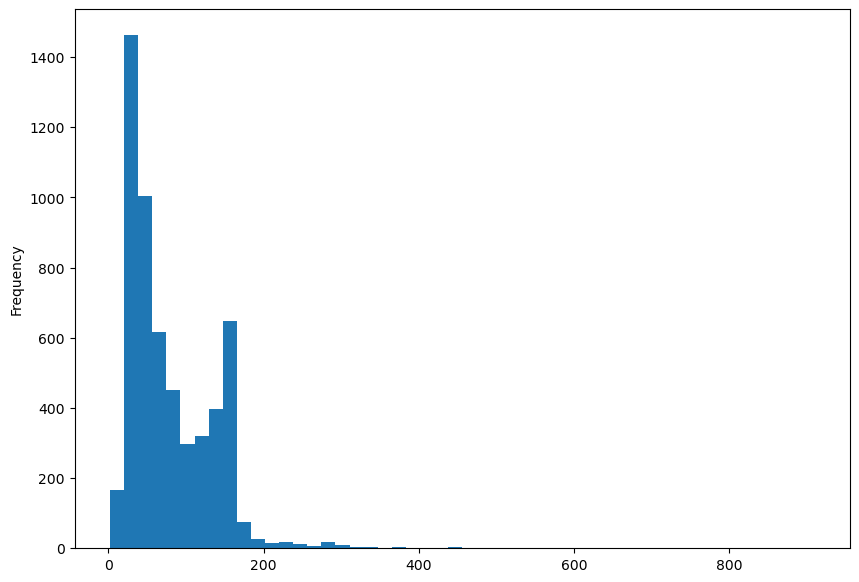

In [34]:
sms['length'].plot(bins=50, kind='hist',figsize=(10,7))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

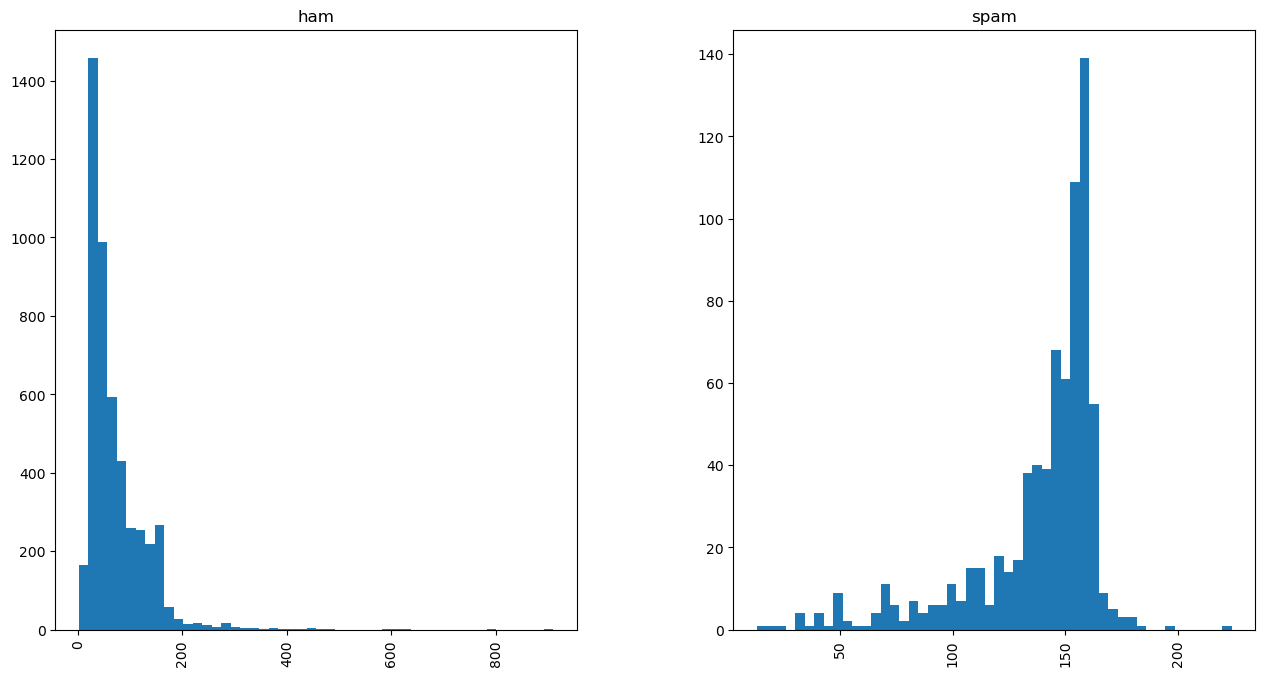

In [35]:
sms.hist(column='length', by='Label', bins=50, figsize=(15,8))

In [36]:
from sklearn.preprocessing import LabelEncoder
Encoder =LabelEncoder()
sms['Label']=Encoder.fit_transform(sms['Label'])

In [37]:
sms.head()

,Label,Text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
sms.to_csv('clean.csv', index=False)

# **Logistic Regression:**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
X = sms['Text']
y = sms['Label']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [43]:
model = LogisticRegression(random_state=15)
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=15)

In [44]:
y_pred = model.predict(X_test_tfidf)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_mat)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9659192825112107
Confusion Matrix:
[[964   1]
 [ 37 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [46]:
new_messages =  ["Hi, just checking in. How are you doing today?"]

new_messages_tfidf = tfidf_vectorizer.transform(new_messages)
predictions = model.predict(new_messages_tfidf)

for message, prediction in zip(new_messages, predictions):
    print(f'Message: {message}\nPrediction: {"Spam" if prediction == 1 else "Not Spam"}\n')

Message: Hi, just checking in. How are you doing today?
Prediction: Not Spam



In [47]:
new_messages =  ["To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"]

new_messages_tfidf = tfidf_vectorizer.transform(new_messages)
predictions = model.predict(new_messages_tfidf)

for message, prediction in zip(new_messages, predictions):
    print(f'Message: {message}\nPrediction: {"Spam" if prediction == 1 else "Not Spam"}\n')

Message: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text
Prediction: Spam



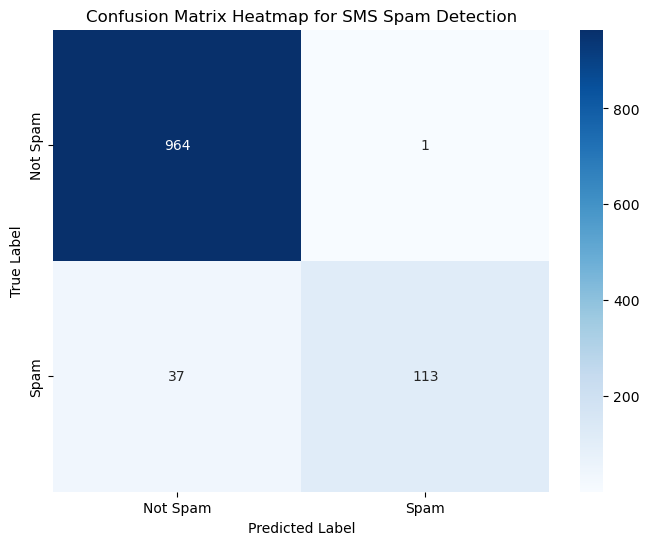

In [48]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for SMS Spam Detection')
plt.show()

# Multi-Layer Perceptron (MLP) Classifier:

In [49]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_model.fit(X_train_tfidf, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [51]:
y_preds = mlp_model.predict(X_test_tfidf)

In [52]:
accuracy = accuracy_score(y_test, y_preds)
confusion_mat = confusion_matrix(y_test, y_preds)
classification_rep = classification_report(y_test, y_preds)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_mat)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9811659192825112
Confusion Matrix:
[[962   3]
 [ 18 132]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [53]:
new_messages =  ["To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"]

new_messages_tfidf = tfidf_vectorizer.transform(new_messages)
predictions = mlp_model.predict(new_messages_tfidf)

for message, prediction in zip(new_messages, predictions):
    print(f'Message: {message}\nPrediction: {"Spam" if prediction == 1 else "Not Spam"}\n')

Message: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text
Prediction: Spam



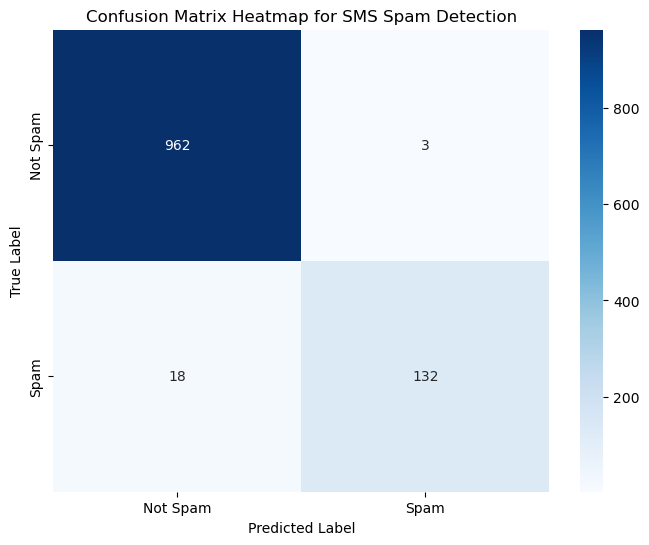

In [54]:
confusion_mats = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for SMS Spam Detection')
plt.show()